# Integer Encoding and Padding Using IMDB Review Data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch
from tqdm import tqdm
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

#### IMDB dataset having 50K movie reviews is a dataset for binary sentiment classification

In [41]:
df = pd.read_csv("IMDB Dataset.csv")
df

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [43]:
df.isna().value_counts()

review  sentiment
False   False        50000
dtype: int64

<Axes: >

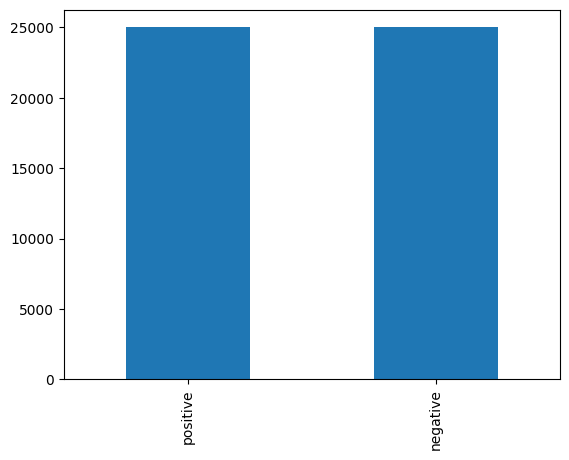

In [44]:
df["sentiment"].value_counts().plot(kind="bar")

In [45]:
print(df.groupby("sentiment").size().reset_index(name="count"))

  sentiment  count
0  negative  25000
1  positive  25000


In [46]:
df["sentiment"] = df["sentiment"].replace(["positive", "negative"], [1, 0])

df.head()

review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1

#### DL model input을 위해 text -> binary ( binary classification)

In [47]:
X_data = df["review"]
y_data = df["sentiment"]
print(f"cnt of review : {len(X_data)}")
print(f"cnt of label : {len(y_data)}")

cnt of review : 50000
cnt of label : 50000


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42, stratify=y_data)

print('--------train data rate-----------')
print(f'positive = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'negative = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')
print('\n--------test data rate-----------')
print(f'positive = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'negative = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------train data rate-----------
positive = 50.0%
negative = 50.0%

--------test data rate-----------
positive = 50.0%
negative = 50.0%


In [49]:
X_train[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

### Tokenization

In [50]:
def tokenize(sentences):
    tokenized_sentences = []
    for sent in tqdm(sentences):
        tokenized_sent = word_tokenize(sent)
        tokenized_sent = [word.lower() for word in tokenized_sent]
        tokenized_sentences.append(tokenized_sent)
        
    return tokenized_sentences      

In [51]:
tokenized_X_train = tokenize(X_train)
tokenized_X_test = tokenize(X_test)

100% 35000/35000 [00:45<00:00, 771.10it/s]
100% 15000/15000 [00:20<00:00, 742.20it/s]


In [52]:
for sent in tokenized_X_train[:2]:
    print(sent)

['if', 'you', 'want', 'to', 'see', 'a', 'true', 'thriller', ',', 'rent', 'this', '!', '!', '!', 'it', "'s", 'not', 'from', 'the', 'director', 'or', 'screenwriter', 'of', '``', 'scream', "''", ',', 'does', "n't", 'feature', 'overacting', ',', 'overpaid', '``', 'tv', "''", 'actors', 'passing', 'off', 'as', '``', 'stars', "''", ',', 'and', 'is', 'not', 'a', 'run', 'of', 'the', 'mill', 'special', 'effects', 'bonanza', '.', 'instead', 'you', "'ll", 'get', 'a', 'top-notch', ',', 'edgy', ',', 'very', 'strong', '(', 'in', 'violence', ')', 'yet', 'thrilling', 'nailbiter', '.']
['this', 'is', 'one', 'of', 'the', 'first', 'and', 'best', 'columbos', ',', 'starring', 'robert', 'culp', 'and', 'ray', 'milland', '.', 'robert', 'culp', 'appeared', 'on', 'another', 'columbo', ',', 'as', 'did', 'several', 'other', 'villains', ',', 'including', 'patrick', 'mcgoohan', ',', 'william', 'shatner', ',', 'and', 'jack', 'cassidy', '.', 'ray', 'milland', 'also', 'made', 'a', 'later', 'appearance.', '<', 'br', '/'

In [53]:
word_list = []
for sent in tokenized_X_train:
    for word in sent:
        word_list.append(word)
        
word_counts = Counter(word_list)
print("total word count : ", len(word_counts))

total word count :  134540


In [54]:
print(word_counts)

Counter({'the': 463248, ',': 380253, '.': 326643, 'and': 225422, 'a': 224320, 'of': 201266, 'to': 186399, 'is': 151391, '/': 140157, '>': 140032, '<': 139911, 'br': 139793, 'it': 131494, 'in': 128883, 'i': 122099, 'this': 105082, 'that': 99961, "'s": 85163, 'was': 69872, 'as': 63979, 'for': 61060, 'with': 61004, 'movie': 59552, 'but': 57841, 'film': 53744, ')': 49527, '(': 48354, 'you': 48042, 'on': 46693, "n't": 46422, "''": 46378, '``': 45847, 'not': 43494, 'are': 41893, 'he': 40827, 'his': 40072, 'have': 39447, 'be': 37031, 'one': 36320, '!': 34107, 'at': 32507, 'all': 31868, 'they': 31402, 'by': 30978, 'an': 29886, 'who': 29470, 'from': 28140, 'so': 27688, 'like': 27202, 'there': 25795, 'or': 24781, 'just': 24375, 'do': 24315, 'her': 24120, 'if': 23778, 'about': 23608, 'has': 23393, 'out': 23015, '?': 22473, 'what': 22251, 'some': 21760, 'good': 20127, 'when': 19549, 'more': 19421, 'very': 19148, 'she': 18737, 'would': 18506, 'even': 17297, 'no': 17224, 'my': 17062, 'up': 16986, 'c

In [55]:
print("count of the word 'the' : ", word_counts["the"])
print("count of the word 'love' : ", word_counts["love"])

count of the word 'the' :  463248
count of the word 'love' :  8842


#### key=word_counts.get : dictionary의 value를 기준으로 sorting

In [56]:
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print('Top 10 most frequent words', vocab[:10])

Top 10 most frequent words ['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>']


In [58]:
print(vocab)

['the', ',', '.', 'and', 'a', 'of', 'to', 'is', '/', '>', '<', 'br', 'it', 'in', 'i', 'this', 'that', "'s", 'was', 'as', 'for', 'with', 'movie', 'but', 'film', ')', '(', 'you', 'on', "n't", "''", '``', 'not', 'are', 'he', 'his', 'have', 'be', 'one', '!', 'at', 'all', 'they', 'by', 'an', 'who', 'from', 'so', 'like', 'there', 'or', 'just', 'do', 'her', 'if', 'about', 'has', 'out', '?', 'what', 'some', 'good', 'when', 'more', 'very', 'she', 'would', 'even', 'no', 'my', 'up', 'can', 'which', 'time', 'really', 'only', 'had', 'their', 'see', 'story', 'were', 'did', 'me', 'we', 'does', '...', "'", ':', '-', 'than', 'much', 'well', 'could', 'get', 'been', 'other', 'will', 'bad', 'also', 'great', 'people', 'into', 'because', 'how', 'him', 'most', 'first', 'its', 'then', 'made', 'them', 'make', 'way', 'any', 'after', 'movies', 'too', 'think', 'characters', '*', 'character', 'watch', ';', 'films', 'many', 'seen', 'being', 'two', 'never', 'where', 'love', 'acting', 'best', 'know', 'plot', 'show', 

In [65]:
threshold = 3
total_cnt = len(word_counts)
rare_word_cnt = 0
total_freq = 0
rare_word_freq = 0

for key, value in word_counts.items():
    total_freq += value
    
    if value < threshold:
        rare_word_cnt += 1
        rare_word_freq += value
        
print('Size of the vocabulary:', total_cnt)
print(f'Number of rare words with frequency of {(threshold - 1)} or less: {(rare_word_cnt)}')
print('Percentage of rare words in the vocabulary:', (rare_word_cnt / total_cnt) * 100)
print('Percentage of occurrences accounted for by rare words:', (rare_word_freq / total_freq) * 100)

Size of the vocabulary: 134540
Number of rare words with frequency of 2 or less: 83989
Percentage of rare words in the vocabulary: 62.42678757246915
Percentage of occurrences accounted for by rare words: 1.0241759373913237


#### 등장 횟수가 threshold 미만, 즉 2회 이하인 단어의 수는 62%를 차지함.
#### 하지만 그 등장 빈도로 차지하는 비중은 1.02%로 매우 적음.
#### 따라서 이 단어들을 Encoding 과정에서 제외.

In [66]:
vocab_size = total_cnt - rare_word_cnt
vocab = vocab[:vocab_size]
print("vocab size : ", len(vocab))

vocab size :  50551


`word_to_index["<PAD>"] = 0` : Add <PAD> token for padding  
`word_to_index["<UNK>"] = 1` : Add <UNK> token for unknown word

In [69]:
word_to_index = {}
word_to_index["<PAD>"] = 0
word_to_index["<UNK>"] = 1

for i, word in enumerate(vocab):
    word_to_index[word] = i + 2
    
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, 'the': 2, ',': 3, '.': 4, 'and': 5, 'a': 6, 'of': 7, 'to': 8, 'is': 9, '/': 10, '>': 11, '<': 12, 'br': 13, 'it': 14, 'in': 15, 'i': 16, 'this': 17, 'that': 18, "'s": 19, 'was': 20, 'as': 21, 'for': 22, 'with': 23, 'movie': 24, 'but': 25, 'film': 26, ')': 27, '(': 28, 'you': 29, 'on': 30, "n't": 31, "''": 32, '``': 33, 'not': 34, 'are': 35, 'he': 36, 'his': 37, 'have': 38, 'be': 39, 'one': 40, '!': 41, 'at': 42, 'all': 43, 'they': 44, 'by': 45, 'an': 46, 'who': 47, 'from': 48, 'so': 49, 'like': 50, 'there': 51, 'or': 52, 'just': 53, 'do': 54, 'her': 55, 'if': 56, 'about': 57, 'has': 58, 'out': 59, '?': 60, 'what': 61, 'some': 62, 'good': 63, 'when': 64, 'more': 65, 'very': 66, 'she': 67, 'would': 68, 'even': 69, 'no': 70, 'my': 71, 'up': 72, 'can': 73, 'which': 74, 'time': 75, 'really': 76, 'only': 77, 'had': 78, 'their': 79, 'see': 80, 'story': 81, 'were': 82, 'did': 83, 'me': 84, 'we': 85, 'does': 86, '...': 87, "'": 88, ':': 89, '-': 90, 'than': 91, 'much': 

#### tokenizated sentence을 integer로 mapping, deleted rare word는 <UNK>(1)로 대체

In [70]:
def text_to_sequences(tokenized_X_data, word_to_index):
    encoded_X_data = []
    for sent in tokenized_X_data:
        index_sequences = []
        for word in sent:
            try:
                index_sequences.append(word_to_index[word])
            except:
                index_sequences.append(word_to_index["<UNK>"])
        encoded_X_data.append(index_sequences)
        
    return encoded_X_data

In [71]:
encoded_X_train = text_to_sequences(tokenized_X_train, word_to_index)
encoded_X_test = text_to_sequences(tokenized_X_test, word_to_index)

In [72]:
print(encoded_X_train[0])

[56, 29, 195, 8, 80, 6, 310, 794, 3, 835, 17, 41, 41, 41, 14, 19, 34, 48, 2, 182, 52, 2841, 7, 33, 2112, 32, 3, 86, 31, 784, 4565, 3, 24973, 33, 263, 32, 170, 2803, 144, 21, 33, 434, 32, 3, 5, 9, 34, 6, 538, 7, 2, 6162, 320, 305, 9624, 4, 314, 29, 243, 95, 6, 5759, 3, 4691, 3, 66, 582, 28, 15, 576, 27, 257, 3257, 1, 4]


### 기존의 word_to_index를 뒤집어 inter -> word dictionary 생성

In [73]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value] = key

In [79]:
decoded_sample = [index_to_word[word] for word in encoded_X_train[0]]

print("existing 1st sample : ", tokenized_X_train[0])
print()
print("decoded 1st sample  : ", decoded_sample)

existing 1st sample :  ['if', 'you', 'want', 'to', 'see', 'a', 'true', 'thriller', ',', 'rent', 'this', '!', '!', '!', 'it', "'s", 'not', 'from', 'the', 'director', 'or', 'screenwriter', 'of', '``', 'scream', "''", ',', 'does', "n't", 'feature', 'overacting', ',', 'overpaid', '``', 'tv', "''", 'actors', 'passing', 'off', 'as', '``', 'stars', "''", ',', 'and', 'is', 'not', 'a', 'run', 'of', 'the', 'mill', 'special', 'effects', 'bonanza', '.', 'instead', 'you', "'ll", 'get', 'a', 'top-notch', ',', 'edgy', ',', 'very', 'strong', '(', 'in', 'violence', ')', 'yet', 'thrilling', 'nailbiter', '.']

decoded 1st sample  :  ['if', 'you', 'want', 'to', 'see', 'a', 'true', 'thriller', ',', 'rent', 'this', '!', '!', '!', 'it', "'s", 'not', 'from', 'the', 'director', 'or', 'screenwriter', 'of', '``', 'scream', "''", ',', 'does', "n't", 'feature', 'overacting', ',', 'overpaid', '``', 'tv', "''", 'actors', 'passing', 'off', 'as', '``', 'stars', "''", ',', 'and', 'is', 'not', 'a', 'run', 'of', 'the', '

## Padding

max length of review :  2818
average length of review :  278.4315142857143


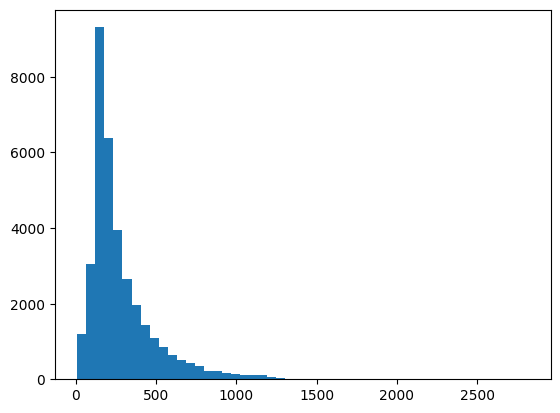

In [81]:
print("max length of review : ", max(len(review) for review in encoded_X_train))
print("average length of review : ", sum(map(len, encoded_X_train)) / len(encoded_X_train))
plt.hist([len(review) for review in encoded_X_train], bins=50)
plt.show()

### sentence length <= max_len인 문장의 개수와 비율을 계산해 적절한 threshold를 선택,
### 길이가 다른 문장들을 max_len에 맞춰 Padding

In [86]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if len(sentence) <= max_len:
            count += 1
    print(f'Percentage of samples with a length of {max_len} or less: {(count / len(nested_list)) * 100} %')

In [87]:
max_len = 1000
below_threshold_len(max_len, encoded_X_train)

Percentage of samples with a length of 1000 or less: 98.59714285714286 %


In [90]:
def pad_sequences(sentences, max_len):
    features = np.zeros((len(sentences), max_len), dtype=int)
    for i, sentence in enumerate(sentences):
        if len(sentence) != 0:
            features[i, :len(sentence)] = np.array(sentence)[:max_len]
            
    return features

In [91]:
padded_X_train = pad_sequences(encoded_X_train, max_len)
padded_X_test = pad_sequences(encoded_X_test, max_len)

In [92]:
print("train data size : ", padded_X_train.shape)
print("test data size : ", padded_X_test.shape)

train data size :  (35000, 1000)
test data size :  (15000, 1000)


### model input으로 사용하기 위해 padding 진행

In [93]:
len(padded_X_train[0])

1000

In [94]:
print(padded_X_train[0])

[   56    29   195     8    80     6   310   794     3   835    17    41
    41    41    14    19    34    48     2   182    52  2841     7    33
  2112    32     3    86    31   784  4565     3 24973    33   263    32
   170  2803   144    21    33   434    32     3     5     9    34     6
   538     7     2  6162   320   305  9624     4   314    29   243    95
     6  5759     3  4691     3    66   582    28    15   576    27   257
  3257     1     4     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   